In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt   #import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# df = pd.read_csv(r'/home/uia72388/Share_A/New Data/MYDATA.csv', index_col=0)
# df.head()

In [1]:
# vels = df['vdy.velocity']
# vels.describe()

In [4]:
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import statsmodels as st
import scipy as sp

In [6]:
nc = range(1,20)  #clusters
kmeans = [KMeans(n_clusters = i) for i in nc]
kmeans

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max

In [7]:
X= vels.values.reshape(-1, 1)

In [3]:
# X

In [9]:
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

In [10]:
score

[-27339305.705397125,
 -7614872.604300787,
 -3427591.9740599818,
 -1817453.4301249343,
 -1238579.6337478356,
 -805404.5679625245,
 -602461.0024921973,
 -463925.1890425456,
 -362524.33149681584,
 -303352.55366021005,
 -252730.89041953092,
 -213944.02638427223,
 -178311.37033784983,
 -155206.72628609592,
 -133280.23776063503,
 -114669.96639471044,
 -103281.4126259767,
 -93389.67208126732,
 -83309.90369989161]

In [11]:
import matplotlib.pyplot as plt

In [12]:
# df1 = pd.DataFrame({"Number of clusters":nc,"Score: % of variance explained":score})
# #fig, ax = plt.subplots(figsize=(10,10))
# sns.lmplot(x="Number of clusters", y= "Score: % of variance explained",data=df1, legend_out=True, size=7)
# plt.axvline(3,linestyle='--',color='r')
# plt.axvline(4,linestyle='--',color='g')
# plt.axvline(5,linestyle='--',color='y')
# plt.legend(['n_clust=3', 'n_clust=4', 'n_clust=5'])


# '''plt.xlabel('Number of clusters')
# plt.ylabel('Score: % of variance explained')
# plt.title('Elbow Curve')
# plt.figure(figsize=(10,10))'''

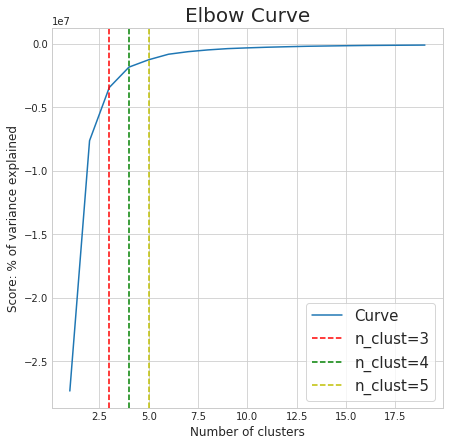

In [18]:
plt.figure(figsize=(7,7))
plt.xlabel('Number of clusters', fontsize=12)
plt.ylabel('Score: % of variance explained', fontsize=12)
plt.title('Elbow Curve', fontsize=20)
plt.plot(nc,score)
plt.axvline(3,linestyle='--',color='r')
plt.axvline(4,linestyle='--',color='g')
plt.axvline(5,linestyle='--',color='y')
plt.legend(['Curve','n_clust=3', 'n_clust=4', 'n_clust=5'], loc='best', frameon=True, prop={'size':15})
plt.savefig('Elbow1.jpg')

"plt.xlabel('Number of clusters')\nplt.ylabel('Score: % of variance explained')\nplt.title('Elbow Curve')\nplt.figure(figsize=(10,10))"

<Figure size 504x504 with 0 Axes>

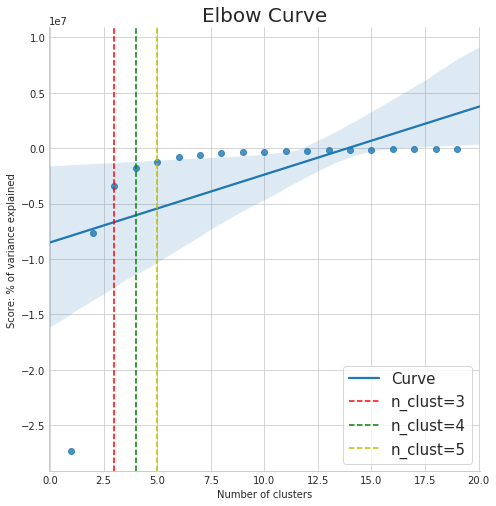

In [20]:
df1 = pd.DataFrame({"Number of clusters":nc,"Score: % of variance explained":score})
plt.figure(figsize=(7,7))
sns.lmplot(x="Number of clusters", y= "Score: % of variance explained",data=df1, legend_out=True, size=7)
plt.axvline(3,linestyle='--',color='r')
plt.axvline(4,linestyle='--',color='g')
plt.axvline(5,linestyle='--',color='y')

plt.legend(['Curve','n_clust=3', 'n_clust=4', 'n_clust=5'], loc='best', frameon=True, prop={'size':15})
plt.title('Elbow Curve', fontsize=20)
plt.savefig('Elbow2.jpg')

'''plt.xlabel('Number of clusters')
plt.ylabel('Score: % of variance explained')
plt.title('Elbow Curve')
plt.figure(figsize=(10,10))'''

In [21]:
##### data = sorted(df['vdy.velocity'].values)
from scipy.cluster.vq import kmeans,vq
centroids,labels = kmeans(data, 4 )
idx,_ = vq(data,centroids)
df2= pd.DataFrame({'idx':idx,'velocity':data})
df2.head()

NameError: name 'data' is not defined

In [24]:
df2.idx.unique()

array([1, 2, 0, 3])

In [25]:
#0
v1=[]
for _,row in df2.iterrows():
    if row['idx'] == 1:
        v1.append(row['velocity'])
#5
v2=[]
for _,row in df2.iterrows():
    if row['idx'] == 0:
        v2.append(row['velocity'])
#13
v3=[]
for _,row in df2.iterrows():
    if row['idx'] == 3:
        v3.append(row['velocity'])
v4=[]
for _,row in df2.iterrows():
    if row['idx'] == 2:
        v4.append(row['velocity'])        

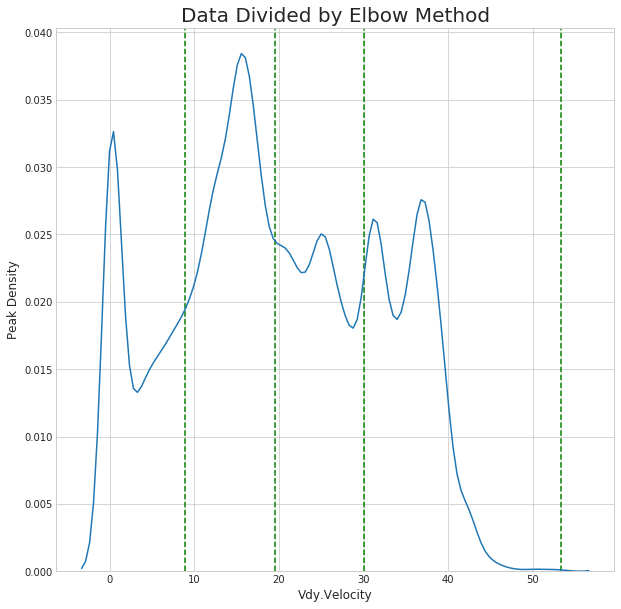

In [28]:
plt.figure(figsize=(10,10))
plt.axvline(max(v1),linestyle='--',color='g')
plt.axvline(max(v2),linestyle='--',color='g')
plt.axvline(max(v3),linestyle='--',color='g')
plt.axvline(max(v4),linestyle='--',color='g')
sns.distplot(df['vdy.velocity'], kde=True, hist=False)
plt.title("Data Divided by Elbow Method" , fontsize=20)
plt.xlabel('Vdy.Velocity', fontsize=12)
plt.ylabel('Peak Density', fontsize=12)
plt.savefig('Elbow Method.jpg')